In [7]:
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import datasets

boston = datasets.load_boston()
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
y = boston["target"]
X = df
df.head(5)

C:\Users\herbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)
sgd_model = linear_model.SGDRegressor()
sgd_model.fit(X, y.ravel())
sgd_model.intercept_ #theta0 
sgd_model.coef_ #theta1

array([-6.76830852e+10,  7.70442775e+10, -8.69155134e+10,  9.46568887e+10,
       -1.10415659e+10, -4.93467077e+10, -8.60225297e+10, -2.62496055e+11,
       -1.69767314e+11, -1.99141986e+09, -8.47469055e+11,  3.00080843e+11,
       -1.47054570e+11])

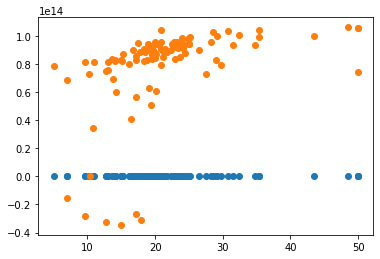

In [13]:
predict = modelo.predict(X_test)
predict_sgd = sgd_model.predict(X_test)

plt.scatter(y_test,predict)
plt.scatter(y_test,predict_sgd)
plt.show()

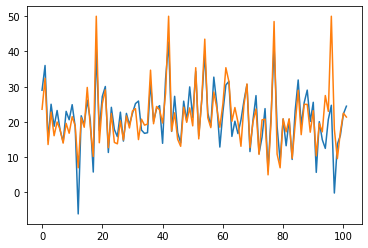

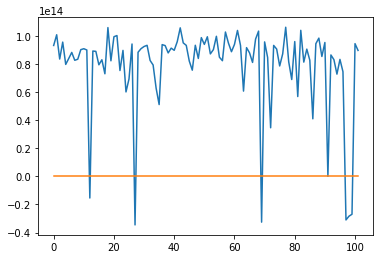

In [14]:
plt.plot(predict)
plt.plot(y_test)
plt.show()
plt.plot(predict_sgd)
plt.plot(y_test)
plt.show()

In [15]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predict - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, predict))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, predict))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_test, predict)))
print("R2-score: %.2f" % r2_score(predict, y_test))

Soma dos Erros ao Quadrado (SSE): 2478 
Erro Quadrático Médio (MSE): 24.29
Erro Médio Absoluto (MAE): 3.19
Raiz do Erro Quadrático Médio (RMSE): 4.93 
R2-score: 0.63


In [16]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predict_sgd - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, predict_sgd))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, predict_sgd))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_test, predict_sgd)))
print("R2-score: %.2f" % r2_score(predict_sgd, y_test))

Soma dos Erros ao Quadrado (SSE): 736086725757457140047304196096 
Erro Quadrático Médio (MSE): 7216536527033893228048809984.00
Erro Médio Absoluto (MAE): 82477461319115.12
Raiz do Erro Quadrático Médio (RMSE): 84950200276596.72 
R2-score: -6.60
